<a href="https://colab.research.google.com/github/ugyenn-tsheringg/Image-Captioning-System-for-Visually-Impaired-Individals-using-CNN-LSTM-VQA-TTS/blob/main/Getting%20some%20error%20with%20hdf5%20cell%2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This cell mounts Google Drive to store checkpoints, GloVe embeddings, and other outputs.
Ensures access to '/content/drive/My Drive' for saving and loading files.

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Check if mounted successfully
if os.path.exists('/content/drive/My Drive'):
    print("Result: Google Drive mounted successfully")
else:
    print("Result: Failed to mount Google Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Result: Google Drive mounted successfully


Authenticates the user with Kaggle to download datasets (e.g., MSCOCO 2017) using kagglehub.
Requires a valid Kaggle API token (kaggle.json) configured in Colab.

In [ ]:
import kagglehub

# Authenticate with Kaggle API
try:
    kagglehub.login()
    print("Result: Kaggle API authentication successful")
except Exception as e:
    print(f"Result: Kaggle API authentication failed - {str(e)}")

Result: Kaggle API authentication successful
Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
"""Cell 3: Download MSCOCO 2017 and requirements datasets from Kaggle.

Downloads the MSCOCO 2017 dataset and a requirements file using kagglehub.
Stores datasets in a local cache and prints the paths for verification.
"""

import kagglehub

# Download datasets
try:
    coco_path = kagglehub.dataset_download('awsaf49/coco-2017-dataset')
    req_path = kagglehub.dataset_download('ugyenntsheringg/requirement')
    print(f"Result: Datasets downloaded successfully")
    print(f"MSCOCO dataset path: {coco_path}")
    print(f"Requirements path: {req_path}")
except Exception as e:
    print(f"Result: Dataset download failed - {str(e)}")

Result: Datasets downloaded successfully
MSCOCO dataset path: /kaggle/input/coco-2017-dataset
Requirements path: /root/.cache/kagglehub/datasets/ugyenntsheringg/requirement/versions/1


In [ ]:
import json
import os
import random
from collections import defaultdict
import kagglehub

# Get the actual dataset path
coco_path = kagglehub.dataset_download('awsaf49/coco-2017-dataset')
print(f"Downloaded dataset path: {coco_path}")

# Set paths (adjust based on ls output)
DATA_DIR = os.path.join(coco_path, 'coco2017')  # Adjust if needed
ANNOTATION_FILE = os.path.join(DATA_DIR, 'annotations', 'captions_train2017.json')
ANNOTATION_FILE2 = os.path.join(DATA_DIR, 'annotations', 'captions_val2017.json')
IMAGE_FOLDER = os.path.join(DATA_DIR, 'train2017')
IMAGE_FOLDER2 = os.path.join(DATA_DIR, 'val2017')
CHECKPOINT_DIR = '/content/drive/My Drive/fyp_2/checkpoints'
GLOVE_DIR = '/content/drive/My Drive/fyp_2'
GLOVE_PATH = os.path.join(GLOVE_DIR, 'glove.6B.300d.txt')

# Verify paths exist
try:
    assert os.path.exists(ANNOTATION_FILE), f"Training annotations not found at {ANNOTATION_FILE}"
    assert os.path.exists(IMAGE_FOLDER), f"Training images not found at {IMAGE_FOLDER}"
    print("Result: Data paths verified")
except AssertionError as e:
    print(f"Result: Path verification failed - {str(e)}")
    raise

# Load annotations
try:
    with open(ANNOTATION_FILE, 'r') as f:
        annotations = json.load(f)
    print("Result: Training annotations loaded successfully")
except Exception as e:
    print(f"Result: Failed to load annotations - {str(e)}")
    raise

# Build a dictionary: image_id -> list of captions
captions_dict = defaultdict(list)
for ann in annotations['annotations']:
    image_id = ann['image_id']
    caption = ann['caption']
    captions_dict[image_id].append(caption)

# Use all image IDs for full dataset
all_image_ids = list(captions_dict.keys())
selected_image_ids = all_image_ids
filtered_captions_dict = captions_dict

print(" ")

# Check sample
sample_image_id = random.choice(selected_image_ids)
print(f"Image ID: {sample_image_id}")
print("Captions:")
for cap in filtered_captions_dict[sample_image_id]:
    print("-", cap)
print(" ")
print(f"Result: Sample captions printed successfully, {len(selected_image_ids)} images selected")

Downloaded dataset path: /kaggle/input/coco-2017-dataset
Result: Data paths verified
Result: Training annotations loaded successfully
 
Image ID: 223462
Captions:
- A cat sitting behind a laptop computer on a desk.
- A cat is sitting behind a laptop staring at the camera. 
- a cat is sitting near a laptop in a room
- Cat sitting behind laptop computer screen in living area.
- A google eyed cat is sitting behind a computer terminal.
 
Result: Sample captions printed successfully, 118287 images selected


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
"""Cell 6: Clean and tokenize captions.

Cleans captions by converting to lowercase, removing punctuation, and normalizing spaces.
Tokenizes captions using NLTK's word_tokenize. Stores results in cleaned_captions_dict.
"""

from nltk.tokenize import word_tokenize
import re

def clean_caption(caption):
    """Clean a caption by lowercasing, removing punctuation, and normalizing spaces.

    Args:
        caption (str): Input caption text.

    Returns:
        str: Cleaned caption.
    """
    caption = caption.lower()
    caption = re.sub(r"[^a-z0-9\s]", "", caption)
    caption = re.sub(r"\s+", " ", caption).strip()
    return caption

# Clean and tokenize captions
cleaned_captions_dict = {}
try:
    for image_id in selected_image_ids:
        captions = filtered_captions_dict[image_id]
        cleaned_captions = []
        for cap in captions:
            clean_cap = clean_caption(cap)
            tokens = word_tokenize(clean_cap)
            cleaned_captions.append(tokens)
        cleaned_captions_dict[image_id] = cleaned_captions
    print("Result: Captions cleaned and tokenized successfully")
except Exception as e:
    print(f"Result: Caption cleaning failed - {str(e)}")
    raise

# Check sample
print("Cleaned captions for image ID:", sample_image_id)
for cap in cleaned_captions_dict[sample_image_id]:
    print(cap)
print(f"Result: Sample cleaned captions printed successfully, {len(cleaned_captions_dict)} images processed")

Result: Captions cleaned and tokenized successfully
Cleaned captions for image ID: 223462
['a', 'cat', 'sitting', 'behind', 'a', 'laptop', 'computer', 'on', 'a', 'desk']
['a', 'cat', 'is', 'sitting', 'behind', 'a', 'laptop', 'staring', 'at', 'the', 'camera']
['a', 'cat', 'is', 'sitting', 'near', 'a', 'laptop', 'in', 'a', 'room']
['cat', 'sitting', 'behind', 'laptop', 'computer', 'screen', 'in', 'living', 'area']
['a', 'google', 'eyed', 'cat', 'is', 'sitting', 'behind', 'a', 'computer', 'terminal']
Result: Sample cleaned captions printed successfully, 118287 images processed


In [ ]:
"""Cell 7: Build vocabulary from tokenized captions.

Creates a vocabulary by counting word frequencies, filtering words with frequency >= min_word_freq,
and assigning indices to words, including special tokens (<pad>, <start>, <end>, <unk>).
"""

from collections import Counter

# Build vocabulary
min_word_freq = 5
word_freq = Counter()

try:
    for image_id in selected_image_ids:
        for tokens in cleaned_captions_dict[image_id]:
            word_freq.update(tokens)
    print("Result: Word frequencies counted successfully")
except Exception as e:
    print(f"Result: Word frequency counting failed - {str(e)}")
    raise

# Filter words below the threshold
words = [word for word in word_freq if word_freq[word] >= min_word_freq]

# Special tokens
word_map = {
    '<pad>': 0,
    '<start>': 1,
    '<end>': 2,
    '<unk>': 3
}

# Add words to vocabulary
for i, word in enumerate(words, start=4):
    word_map[word] = i

# Create reverse mapping
idx2word = {v: k for k, v in word_map.items()}

# Verify vocabulary
print(f"Vocabulary size: {len(word_map)}")
print("Sample word map entries:")
for i, (word, idx) in enumerate(list(word_map.items())[:10]):
    print(f"{word}: {idx}")
print(f"Result: Vocabulary built successfully, {len(word_map)} words")

Result: Word frequencies counted successfully
Vocabulary size: 10307
Sample word map entries:
<pad>: 0
<start>: 1
<end>: 2
<unk>: 3
a: 4
bicycle: 5
replica: 6
with: 7
clock: 8
as: 9
Result: Vocabulary built successfully, 10307 words


In [ ]:
"""Cell 8: Encode captions using the vocabulary.

Encodes tokenized captions into integer sequences using word_map, adding <start> and <end> tokens.
Processes images in batches to manage memory usage for the full dataset.
"""

# Encode captions in batches
encoded_captions = {}
batch_size = 1000

try:
    for i in range(0, len(selected_image_ids), batch_size):
        batch_ids = selected_image_ids[i:i+batch_size]
        for image_id in batch_ids:
            captions = cleaned_captions_dict[image_id]
            encoded = []
            for tokens in captions:
                enc = [word_map.get(word, word_map['<unk>']) for word in tokens]
                enc = [word_map['<start>']] + enc + [word_map['<end>']]
                encoded.append(enc)
            encoded_captions[image_id] = encoded
    print("Result: Captions encoded successfully")
except Exception as e:
    print(f"Result: Caption encoding failed - {str(e)}")
    raise

# Check sample
print("Encoded captions for image ID:", sample_image_id)
for cap in encoded_captions[sample_image_id]:
    print(cap)

# Check <unk> token frequency
unk_count = sum(1 for cap in encoded_captions.values() for c in cap for w in c if w == word_map['<unk>'])
print(f"Number of <unk> tokens in training captions: {unk_count}")
print(f"Result: Sample encoded captions printed successfully, {len(encoded_captions)} images encoded")

Result: Captions encoded successfully
Encoded captions for image ID: 223462
[1, 4, 200, 167, 54, 4, 338, 343, 39, 4, 334, 2]
[1, 4, 200, 22, 167, 54, 4, 338, 1863, 175, 10, 928, 2]
[1, 4, 200, 22, 167, 299, 4, 338, 20, 4, 26, 2]
[1, 200, 167, 54, 338, 343, 720, 20, 622, 110, 2]
[1, 4, 7060, 4620, 200, 22, 167, 54, 4, 343, 718, 2]
Number of <unk> tokens in training captions: 29399
Result: Sample encoded captions printed successfully, 118287 images encoded


In [ ]:
unk_count = sum(1 for cap in encoded_captions.values() for c in cap for w in c if w == word_map['<unk>'])
print(f"Number of <unk> tokens in training captions: {unk_count}")

Number of <unk> tokens in training captions: 29399


In [ ]:
import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 5.1%


In [ ]:
!pip install h5py

In [ ]:
"""Cell 9: Save encoded captions and word map to Google Drive.

Saves the encoded captions and word map as JSON files to the checkpoint directory in Google Drive
for persistent storage and later use in dataset creation.
"""

import json
import h5py
import numpy as np
import os
import logging

# Ensure logging is configured
if not logging.getLogger().hasHandlers():
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Save encoded captions and word map
try:
    # Save as JSON
    encoded_captions_path = os.path.join(CHECKPOINT_DIR, 'encoded_captions.json')
    with open(encoded_captions_path, 'w') as f:
        json.dump({str(k): v for k, v in encoded_captions.items()}, f)
    logger.info(f"Saved JSON captions to {encoded_captions_path}")

    # Save as HDF5
    hdf5_path = os.path.join(CHECKPOINT_DIR, 'encoded_captions.h5')
    # Remove existing file to avoid truncation errors
    if os.path.exists(hdf5_path):
        try:
            os.remove(hdf5_path)
            logger.info(f"Removed existing HDF5 file: {hdf5_path}")
        except Exception as e:
            logger.error(f"Failed to remove existing HDF5 file: {str(e)}")
            raise

    h = None
    try:
        h = h5py.File(hdf5_path, 'w')
        for image_id, caps in encoded_captions.items():
            # Convert list of captions to padded array
            max_len = max(len(cap) for cap in caps)
            padded_caps = np.zeros((len(caps), max_len), dtype=np.int64)
            for i, cap in enumerate(caps):
                padded_caps[i, :len(cap)] = cap
            h.create_dataset(str(image_id), data=padded_caps)
        logger.info(f"Saved HDF5 captions to {hdf5_path}")
    finally:
        if h is not None:
            h.close()
            logger.info(f"Closed HDF5 file: {hdf5_path}")

    word_map_path = os.path.join(CHECKPOINT_DIR, 'word_map.json')
    with open(word_map_path, 'w') as f:
        json.dump(word_map, f)
    logger.info(f"Saved word map to {word_map_path}")

    # Check <unk> token frequency
    unk_count = sum(1 for cap in encoded_captions.values() for c in cap for w in c if w == word_map['<unk>'])
    total_tokens = sum(len(c) for cap in encoded_captions.values() for c in cap)
    unk_percent = unk_count / total_tokens * 100
    print(f"Percentage of <unk> tokens in training captions: {unk_percent:.2f}%")
    if unk_percent > 5:
        print("Warning: High <unk> token frequency. Consider increasing min_word_freq in Cell 7.")
    logger.info(f"<unk> token percentage: {unk_percent:.2f}%")

    print(f"Result: Encoded captions and word map saved to {CHECKPOINT_DIR} (JSON and HDF5)")
except Exception as e:
    logger.error(f"Result: Failed to save files - {str(e)}")
    raise

ERROR:__main__:Result: Failed to save files - [Errno 2] No such file or directory: '/content/drive/My Drive/fyp_2/checkpoints/encoded_captions.json'


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/fyp_2/checkpoints/encoded_captions.json'

In [ ]:
# import h5py
# with h5py.File(os.path.join(CHECKPOINT_DIR, 'encoded_captions.h5'), 'r') as f:
#     print("HDF5 keys:", list(f.keys()))
#     print("Sample dataset shape:", f[list(f.keys())[0]].shape)

HDF5 keys: ['100000', '100001', '100006', '100008', '100010', '100012', '100014', '100016', '100020', '100021', '100022', '100034', '100037', '10005', '100050', '100063', '100064', '100078', '10008', '100081', '100083', '100084', '100087', '100090', '100095', '100098', '100111', '10012', '100124', '100128', '100132', '100138', '10014', '100140', '100142', '10015', '100157', '100159', '100166', '100169', '100177', '100182', '100187', '100196', '100199', '100202', '100203', '100207', '100209', '100215', '100222', '100223', '100226', '10023', '100231', '100234', '10024', '100244', '100245', '100253', '100271', '100273', '100277', '100282', '100300', '100303', '100306', '100311', '100312', '100316', '100318', '100319', '100322', '100329', '100331', '100337', '100343', '100344', '100345', '100347', '100354', '10037', '100371', '100378', '100386', '10039', '100395', '100396', '10040', '100404', '100407', '100409', '10041', '100413', '100417', '100430', '100434', '100435', '100438', '100439',

In [ ]:
"""Cell 11: Download and extract GloVe embeddings.

Downloads the GloVe 6B 300d embeddings to Google Drive if not already present.
Extracts the 300d embeddings file and removes the zip to save space.
"""

import os
import subprocess

# Define GloVe storage directory
GLOVE_DIR = '/content/drive/My Drive/fyp_2'
os.makedirs(GLOVE_DIR, exist_ok=True)

glove_file = os.path.join(GLOVE_DIR, 'glove.6B.300d.txt')
zip_file = os.path.join(GLOVE_DIR, 'glove.6B.zip')

# Download and extract GloVe if not present
if not os.path.exists(glove_file):
    try:
        # Download GloVe embeddings
        subprocess.run(['wget', 'http://nlp.stanford.edu/data/glove.6B.zip', '-O', zip_file], check=True)
        print("Result: GloVe zip downloaded successfully")

        # Unzip the file
        subprocess.run(['unzip', zip_file, '-d', GLOVE_DIR], check=True)
        print("Result: GloVe zip extracted successfully")

        # Remove the zip file
        os.remove(zip_file)
        print("Result: GloVe zip removed successfully")
    except subprocess.CalledProcessError as e:
        print(f"Result: GloVe download/extraction failed - {str(e)}")
        raise
    except Exception as e:
        print(f"Result: GloVe processing failed - {str(e)}")
        raise
else:
    print("Result: GloVe embeddings already exist")

# Verify GloVe file
if os.path.exists(glove_file):
    print(f"Result: GloVe file found at {glove_file}")
else:
    print(f"Result: GloVe file not found at {glove_file}")
    raise FileNotFoundError(f"GloVe file missing: {glove_file}")

Result: GloVe embeddings already exist
Result: GloVe file found at /content/drive/My Drive/fyp_2/glove.6B.300d.txt


In [ ]:
"""Cell 12: Load GloVe embeddings into memory.

Loads the GloVe 6B 300d embeddings from Google Drive into a dictionary for building
the embedding matrix in the next cell.
"""

import numpy as np
import logging

# Ensure logging is configured (if not already)
if not logging.getLogger().hasHandlers():
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Initialize GloVe dictionary
glove = {}
glove_file = '/content/drive/My Drive/fyp_2/glove.6B.300d.txt'

# Load GloVe embeddings
try:
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            tokens = line.strip().split()
            word = tokens[0]
            vec = np.array(tokens[1:], dtype=np.float32)
            glove[word] = vec
    logger.info("Result: GloVe embeddings loaded successfully")
except FileNotFoundError:
    logger.error(f"Result: GloVe file not found at {glove_file}")
    raise
except Exception as e:
    logger.error(f"Result: Error loading GloVe embeddings - {str(e)}")
    raise

In [ ]:
import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 4.4%


In [ ]:
"""Cell 13: Build and save embedding matrix.

Creates an embedding matrix for the vocabulary using GloVe embeddings.
Non-GloVe words are initialized with uniform random values. Saves the matrix to Google Drive.
"""

import numpy as np

# Build embedding matrix
embedding_dimension = 300
vocab_size = len(word_map)

try:
    embedding_matrix = np.zeros((vocab_size, embedding_dimension), dtype=np.float32)
    for word, idx in word_map.items():
        if word in glove:
            embedding_matrix[idx] = glove[word]
        else:
            embedding_matrix[idx] = np.random.uniform(-0.1, 0.1, size=(embedding_dimension,))

    # Save embedding matrix
    embedding_matrix_path = os.path.join(CHECKPOINT_DIR, 'embedding_matrix.npy')
    np.save(embedding_matrix_path, embedding_matrix)

    logger.info(f"Result: Embedding matrix built and saved successfully, shape: {embedding_matrix.shape}")
    print("Done. Shape:", embedding_matrix.shape)
except Exception as e:
    logger.error(f"Result: Embedding matrix creation failed - {str(e)}")
    raise

Done. Shape: (10307, 300)


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import random
import json
import h5py
import os
import logging

# Ensure logging is configured
if not logging.getLogger().hasHandlers():
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

class CaptionDataset(Dataset):
    """Dataset for loading MSCOCO images and captions from HDF5.

    Args:
        image_folder (str): Path to image directory.
        captions_hdf5_file (str): Path to HDF5 file with encoded captions.
        word_map_file (str): Path to word map JSON.
        transform (callable, optional): Image transformations.
    """
    def __init__(self, image_folder, captions_hdf5_file, word_map_file, transform=None):
        try:
            self.hdf5_file = h5py.File(captions_hdf5_file, 'r')
            with open(word_map_file, 'r') as j:
                self.word_map = json.load(j)
        except Exception as e:
            logger.error(f"Failed to load captions/word map: {str(e)}")
            raise FileNotFoundError(f"Failed to load captions/word map: {str(e)}")

        self.image_folder = image_folder
        self.image_ids = list(self.hdf5_file.keys())
        self.transform = transform
        logger.info(f"Initialized dataset with {len(self.image_ids)} images")

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, index):
        image_id = self.image_ids[index]
        image_path = os.path.join(self.image_folder, f"{int(image_id):012}.jpg")
        try:
            img = Image.open(image_path).convert('RGB')
        except Exception as e:
            logger.error(f"Failed to load image {image_path}: {str(e)}")
            raise FileNotFoundError(f"Failed to load image {image_path}: {str(e)}")

        if self.transform is not None:
            img = self.transform(img)

        try:
            # Validate key exists
            if str(image_id) not in self.hdf5_file:
                logger.error(f"Image ID {image_id} not found in HDF5 file")
                raise KeyError(f"Image ID {image_id} not found in HDF5 file")
            caps = self.hdf5_file[str(image_id)][:]  # Use string key for HDF5
            caption = random.choice(caps)  # Select one caption randomly
            caption = torch.tensor(caption, dtype=torch.long)
            return img, caption
        except (KeyError, Exception) as e:
            logger.error(f"Error accessing captions for image_id {image_id}: {str(e)}")
            # Attempt to reload HDF5 file
            try:
                self.hdf5_file.close()
                self.hdf5_file = h5py.File(self.hdf5_file.filename, 'r')
                caps = self.hdf5_file[str(image_id)][:]
                caption = random.choice(caps)
                caption = torch.tensor(caption, dtype=torch.long)
                logger.info(f"Successfully reloaded HDF5 file for image_id {image_id}")
                return img, caption
            except Exception as e2:
                logger.error(f"Failed to reload HDF5 file for image_id {image_id}: {str(e2)}")
                raise KeyError(f"Failed to access captions for image_id {image_id}: {str(e2)}")

    def __del__(self):
        self.hdf5_file.close()
        logger.info("Closed HDF5 file in dataset")

# Image transformations for training
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

# Create dataset
try:
    dataset = CaptionDataset(
        image_folder=IMAGE_FOLDER,
        captions_hdf5_file=os.path.join(CHECKPOINT_DIR, 'encoded_captions.h5'),
        word_map_file=os.path.join(CHECKPOINT_DIR, 'word_map.json'),
        transform=train_transform
    )
    print("Result: Training dataset created successfully")
except Exception as e:
    print(f"Result: Failed to create dataset - {str(e)}")
    raise

# Create DataLoader
dataloader = DataLoader(
    dataset,
    batch_size=48,
    shuffle=True,
    num_workers=0,  # Temporarily disable multi-worker to avoid HDF5 issues
    pin_memory=True,
    collate_fn=caption_collate_fn
)

# Close HDF5 file
dataset.hdf5_file.close()
logger.info("Closed HDF5 file after DataLoader creation")

# Test a sample batch
try:
    for images, captions, lengths in dataloader:
        print("Image batch shape:", images.shape)
        print("Caption batch shape:", captions.shape)
        print("Lengths:", lengths)
        print("Result: Sample batch loaded successfully")
        break
except Exception as e:
    print(f"Result: Failed to load sample batch - {str(e)}")
    raise

print(torch.cuda.memory_allocated() / 1024**2, "MB")

ERROR:__main__:Image ID 561806 not found in HDF5 file
ERROR:__main__:Error accessing captions for image_id 561806: 'Image ID 561806 not found in HDF5 file'
ERROR:__main__:Failed to reload HDF5 file for image_id 561806: Not a file or file object (not a file or file object)


Result: Training dataset created successfully
Result: Failed to load sample batch - 'Failed to access captions for image_id 561806: Not a file or file object (not a file or file object)'


KeyError: 'Failed to access captions for image_id 561806: Not a file or file object (not a file or file object)'

In [ ]:
print(torch.cuda.memory_allocated() / 1024**2, "MB")

1121.4970703125 MB


In [ ]:
#cell 17
import json
from collections import defaultdict
import random
import h5py
import numpy as np
import os
import logging

# Ensure logging is configured
if not logging.getLogger().hasHandlers():
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Load validation annotations
try:
    with open(ANNOTATION_FILE2, 'r') as f:
        val_annotations = json.load(f)
    print("Result: Validation annotations loaded successfully")
    logger.info("Loaded validation annotations")
except Exception as e:
    print(f"Result: Failed to load validation annotations - {str(e)}")
    logger.error(f"Failed to load validation annotations: {str(e)}")
    raise

# Build validation captions dictionary
val_captions_dict = defaultdict(list)
for ann in val_annotations['annotations']:
    image_id = ann['image_id']
    caption = ann['caption']
    val_captions_dict[image_id].append(caption)

# Use all validation image IDs
val_image_ids = list(val_captions_dict.keys())
selected_val_image_ids = val_image_ids
filtered_val_captions_dict = val_captions_dict

# Clean and tokenize validation captions
cleaned_val_captions_dict = {}
try:
    for image_id in selected_val_image_ids:
        captions = filtered_val_captions_dict[image_id]
        cleaned_captions = []
        for cap in captions:
            clean_cap = clean_caption(cap)
            tokens = word_tokenize(clean_cap)
            cleaned_captions.append(tokens)
        cleaned_val_captions_dict[image_id] = cleaned_captions
    print("Result: Validation captions cleaned successfully")
    logger.info("Cleaned validation captions")
except Exception as e:
    print(f"Result: Validation caption cleaning failed - {str(e)}")
    logger.error(f"Validation caption cleaning failed: {str(e)}")
    raise

# Encode validation captions
encoded_val_captions = {}
try:
    for image_id in selected_val_image_ids:
        captions = cleaned_val_captions_dict[image_id]
        encoded = []
        for tokens in captions:
            enc = [word_map.get(word, word_map['<unk>']) for word in tokens]
            enc = [word_map['<start>']] + enc + [word_map['<end>']]
            encoded.append(enc)
        encoded_val_captions[image_id] = encoded
    print("Result: Validation captions encoded successfully")
    logger.info("Encoded validation captions")
except Exception as e:
    print(f"Result: Validation caption encoding failed - {str(e)}")
    logger.error(f"Validation caption encoding failed: {str(e)}")
    raise

# Save encoded validation captions
try:
    # Save as JSON
    val_captions_path = os.path.join(CHECKPOINT_DIR, 'encoded_captions_val.json')
    with open(val_captions_path, 'w') as f:
        json.dump({str(k): v for k, v in encoded_val_captions.items()}, f)
    logger.info(f"Saved JSON validation captions to {val_captions_path}")

    # Save as HDF5
    val_hdf5_path = os.path.join(CHECKPOINT_DIR, 'encoded_captions_val.h5')
    if os.path.exists(val_hdf5_path):
        try:
            os.remove(val_hdf5_path)
            logger.info(f"Removed existing HDF5 file: {val_hdf5_path}")
        except Exception as e:
            logger.error(f"Failed to remove existing HDF5 file: {str(e)}")
            raise

    h = None
    try:
        h = h5py.File(val_hdf5_path, 'w')
        for image_id, caps in encoded_val_captions.items():
            max_len = max(len(cap) for cap in caps)
            padded_caps = np.zeros((len(caps), max_len), dtype=np.int64)
            for i, cap in enumerate(caps):
                padded_caps[i, :len(cap)] = cap
            h.create_dataset(str(image_id), data=padded_caps)
        logger.info(f"Saved HDF5 validation captions to {val_hdf5_path}")
    finally:
        if h is not None:
            h.close()
            logger.info(f"Closed HDF5 file: {val_hdf5_path}")

    # Check <unk> token percentage
    unk_count = sum(1 for cap in encoded_val_captions.values() for c in cap for w in c if w == word_map['<unk>'])
    total_tokens = sum(len(c) for cap in encoded_val_captions.values() for c in cap)
    unk_percent = unk_count / total_tokens * 100
    print(f"Percentage of <unk> tokens in validation captions: {unk_percent:.2f}%")
    if unk_percent > 5:
        print("Warning: High <unk> token frequency. Consider increasing min_word_freq in Cell 7.")
    logger.info(f"<unk> token percentage in validation: {unk_percent:.2f}%")

    print(f"Result: Validation captions saved to {val_captions_path} (JSON) and {val_hdf5_path} (HDF5)")
except Exception as e:
    print(f"Result: Failed to save validation captions - {str(e)}")
    logger.error(f"Failed to save validation captions: {str(e)}")
    raise

Result: Validation annotations loaded successfully
Result: Validation captions cleaned successfully
Result: Validation captions encoded successfully
Percentage of <unk> tokens in validation captions: 0.48%
Result: Validation captions saved to /content/drive/My Drive/fyp_2/checkpoints/encoded_captions_val.json (JSON) and /content/drive/My Drive/fyp_2/checkpoints/encoded_captions_val.h5 (HDF5)


In [ ]:
"""Cell 18: Create validation dataset and DataLoader.

Sets up the validation dataset using CaptionDataset and creates a DataLoader
for batch processing. Tests a sample batch to verify setup.
"""
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import os
import logging

# Ensure logging is configured
if not logging.getLogger().hasHandlers():
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Define validation transform
val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

# Create validation dataset
try:
    val_dataset = CaptionDataset(
        image_folder=IMAGE_FOLDER2,
        captions_hdf5_file=os.path.join(CHECKPOINT_DIR, 'encoded_captions_val.h5'),
        word_map_file=os.path.join(CHECKPOINT_DIR, 'word_map.json'),
        transform=val_transform
    )
    print("Result: Validation dataset created successfully")
except Exception as e:
    print(f"Result: Failed to create validation dataset - {str(e)}")
    raise

# Create validation DataLoader
val_dataloader = DataLoader(
    val_dataset,
    batch_size=48,
    shuffle=False,
    num_workers=0,  # Temporarily disable multi-worker to avoid HDF5 issues
    pin_memory=True,
    collate_fn=caption_collate_fn
)

# Close HDF5 file
val_dataset.hdf5_file.close()
logger.info("Closed HDF5 file after validation DataLoader creation")

# Test a sample batch
try:
    for images, captions, lengths in val_dataloader:
        print("Image batch shape:", images.shape)
        print("Caption batch shape:", captions.shape)
        print("Lengths:", lengths)
        print("Result: Validation sample batch loaded successfully")
        break
except Exception as e:
    print(f"Result: Failed to load validation sample batch - {str(e)}")
    raise

Result: Validation dataset created successfully
Image batch shape: torch.Size([48, 3, 256, 256])
Caption batch shape: torch.Size([48, 23])
Lengths: tensor([14, 13, 22, 15, 16, 15, 15, 11, 14, 12, 15, 14, 13, 15, 14, 14, 18, 14,
        13, 21, 15, 15, 16, 15, 17, 17, 13, 16, 11, 13, 17, 14, 17, 16, 15, 13,
        13, 16, 13, 16, 15, 23, 14, 14, 15, 13, 12, 12])
Result: Validation sample batch loaded successfully


In [ ]:
"""Cell 19: Print training and validation dataset sizes.

Verifies the number of images in the training and validation datasets.
"""

try:
    print(f"Training dataset size: {len(dataset)}")
    print(f"Validation dataset size: {len(val_dataset)}")
    print("Result: Dataset sizes printed successfully")
except NameError as e:
    print(f"Result: Failed to print dataset sizes - {str(e)}")
    raise

Training dataset size: 118287
Validation dataset size: 5000
Result: Dataset sizes printed successfully


## Attention Module

In [ ]:
"""Cell 20: Define attention module.

Implements a soft attention mechanism to focus on relevant image regions during caption generation.
Used in the DecoderWithAttention module.
"""

import torch
import torch.nn as nn
import torch.nn.functional as F

class Attention(nn.Module):
    """Soft attention mechanism for image captioning.

    Args:
        encoder_dim (int): Dimension of encoder output.
        decoder_dim (int): Dimension of decoder hidden state.
        attention_dim (int): Dimension of attention network.
    """
    def __init__(self, encoder_dim, decoder_dim, attention_dim):
        super(Attention, self).__init__()
        self.encoder_att = nn.Linear(encoder_dim, attention_dim)
        self.decoder_att = nn.Linear(decoder_dim, attention_dim)
        self.full_att = nn.Linear(attention_dim, 1)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, encoder_out, decoder_hidden):
        """Compute attention weights and weighted encoding.

        Args:
            encoder_out (torch.Tensor): Encoded images, shape (batch_size, num_pixels, encoder_dim).
            decoder_hidden (torch.Tensor): Decoder hidden state, shape (batch_size, decoder_dim).

        Returns:
            tuple: (attention_weighted_encoding, alpha)
        """
        att1 = self.encoder_att(encoder_out)
        att2 = self.decoder_att(decoder_hidden)
        att = self.full_att(self.relu(att1 + att2.unsqueeze(1))).squeeze(2)
        alpha = self.softmax(att)
        attention_weighted_encoding = (encoder_out * alpha.unsqueeze(2)).sum(dim=1)
        return attention_weighted_encoding, alpha

print("Result: Attention module defined successfully")

Result: Attention module defined successfully


## Decoder with Attention

In [ ]:
"""Cell 21: Define decoder with attention.

Implements an LSTM-based decoder with soft attention for generating captions
using encoded image features and GloVe embeddings.
"""

import torch
import torch.nn as nn

class DecoderWithAttention(nn.Module):
    """LSTM-based decoder with soft attention for image captioning.

    Args:
        attention_dim (int): Dimension of attention network.
        embed_dim (int): Dimension of word embeddings.
        decoder_dim (int): Dimension of LSTM hidden state.
        vocab_size (int): Size of vocabulary.
        encoder_dim (int): Dimension of encoder output (default: 2048).
        dropout (float): Dropout probability (default: 0.5).
    """
    def __init__(self, attention_dim, embed_dim, decoder_dim, vocab_size, encoder_dim=2048, dropout=0.5):
        super(DecoderWithAttention, self).__init__()
        self.encoder_dim = encoder_dim
        self.attention_dim = attention_dim
        self.embed_dim = embed_dim
        self.decoder_dim = decoder_dim
        self.vocab_size = vocab_size
        self.dropout = dropout
        self.attention = Attention(encoder_dim, decoder_dim, attention_dim)
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        try:
            self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
            self.embedding.weight.requires_grad = True
        except NameError:
            raise NameError("embedding_matrix not defined")
        self.dropout = nn.Dropout(p=self.dropout)
        self.decode_step = nn.LSTMCell(embed_dim + encoder_dim, decoder_dim, bias=True)
        self.init_h = nn.Linear(encoder_dim, decoder_dim)
        self.init_c = nn.Linear(encoder_dim, decoder_dim)
        self.f_beta = nn.Linear(decoder_dim, encoder_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc = nn.Linear(decoder_dim, vocab_size)
        self.init_weights()

    def init_weights(self):
        self.fc.bias.data.fill_(0)
        self.fc.weight.data.uniform_(-0.1, 0.1)

    def init_hidden_state(self, encoder_out):
        mean_encoder_out = encoder_out.mean(dim=1)
        h = self.init_h(mean_encoder_out)
        c = self.init_c(mean_encoder_out)
        return h, c

    def forward(self, encoder_out, encoded_captions, caption_lengths):
        batch_size = encoder_out.size(0)
        encoder_dim = encoder_out.size(-1)
        vocab_size = self.vocab_size
        encoder_out = encoder_out.view(batch_size, -1, encoder_dim)
        num_pixels = encoder_out.size(1)
        caption_lengths, sort_ind = caption_lengths.sort(dim=0, descending=True)
        encoder_out = encoder_out[sort_ind]
        encoded_captions = encoded_captions[sort_ind]
        embeddings = self.embedding(encoded_captions)
        h, c = self.init_hidden_state(encoder_out)
        decode_lengths = caption_lengths - 1
        predictions = torch.zeros(batch_size, max(decode_lengths), vocab_size).to(encoder_out.device)
        alphas = torch.zeros(batch_size, max(decode_lengths), num_pixels).to(encoder_out.device)
        for t in range(max(decode_lengths)):
            batch_size_t = sum([l > t for l in decode_lengths])
            attention_weighted_encoding, alpha = self.attention(encoder_out[:batch_size_t],
                                                               h[:batch_size_t])
            gate = self.sigmoid(self.f_beta(h[:batch_size_t]))
            attention_weighted_encoding = gate * attention_weighted_encoding
            input_lstm = torch.cat([embeddings[:batch_size_t, t, :], attention_weighted_encoding], dim=1)
            h, c = self.decode_step(input_lstm, (h[:batch_size_t], c[:batch_size_t]))
            preds = self.fc(self.dropout(h))
            predictions[:batch_size_t, t, :] = preds
            alphas[:batch_size_t, t, :] = alpha
        return predictions, encoded_captions, decode_lengths, alphas, sort_ind

print("Result: DecoderWithAttention module defined successfully")

Result: DecoderWithAttention module defined successfully


In [ ]:
"""Cell 22: Define encoder module.

Implements a ResNet-101-based encoder to extract image features, with adaptive pooling
and fine-tuning of later layers.
"""
from torchvision.models import resnet101, ResNet101_Weights
import torch.nn as nn

class Encoder(nn.Module):
    """ResNet-101 encoder for image feature extraction.

    Args:
        encoded_image_size (int): Size of output feature map (default: 14).
    """
    def __init__(self, encoded_image_size=14):
        super().__init__()
        self.cnn = resnet101(weights=ResNet101_Weights.IMAGENET1K_V1)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((encoded_image_size, encoded_image_size))
        self.fine_tune()

    def forward(self, images):
        """Extract image features.

        Args:
            images (torch.Tensor): Input images, shape (batch_size, 3, H, W).

        Returns:
            torch.Tensor: Encoded features, shape (batch_size, num_pixels, encoder_dim).
        """
        x = self.cnn.conv1(images)
        x = self.cnn.bn1(x)
        x = self.cnn.relu(x)
        x = self.cnn.maxpool(x)
        x = self.cnn.layer1(x)
        x = self.cnn.layer2(x)
        x = self.cnn.layer3(x)
        x = self.cnn.layer4(x)
        x = self.adaptive_pool(x)
        x = x.permute(0, 2, 3, 1)
        x = x.view(x.size(0), -1, x.size(-1))
        return x

    def fine_tune(self, fine_tune=True):
        """Configure fine-tuning for ResNet layers."""
        for p in self.cnn.parameters():
            p.requires_grad = False
        if fine_tune:
            for p in self.cnn.layer2.parameters():
                p.requires_grad = True
            for p in self.cnn.layer3.parameters():
                p.requires_grad = True
            for p in self.cnn.layer4.parameters():
                p.requires_grad = True
            for p in self.adaptive_pool.parameters():
                p.requires_grad = True

print("Result: Encoder module defined successfully")

Result: Encoder module defined successfully


In [ ]:
"""Cell 24: Test encoder-decoder integration.

Verifies the forward pass of the encoder and decoder using a sample batch from the DataLoader.
Checks output shapes to ensure model compatibility.
"""

import torch
from torchvision.models import ResNet101_Weights

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize models
try:
    encoder = Encoder().to(device)
    decoder = DecoderWithAttention(
        attention_dim=1024,
        embed_dim=300,
        decoder_dim=512,
        vocab_size=len(word_map),
        encoder_dim=2048,
        dropout=0.5
    ).to(device)
    print("Result: Models initialized successfully")
except Exception as e:
    print(f"Result: Model initialization failed: {str(e)}")
    raise

# Test forward pass
try:
    images, captions, lengths = next(iter(dataloader))
    images = images.to(device)
    captions = captions.to(device)
    lengths_tensor = lengths.clone().detach().to(device)

    encoder_out = encoder(images)
    predictions, _, decode_lengths, _, _ = decoder(encoder_out, captions, lengths_tensor)

    print("Encoder output shape:", encoder_out.shape)  # Expected: (batch_size, 196, 2048)
    print("Predictions shape:", predictions.shape)     # Expected: (batch_size, max_len, vocab_size)
    print(f"Result: Forward pass successful, vocab_size: {len(word_map)}")
except Exception as e:
    print(f"Result: Forward pass failed: {str(e)}")
    raise

Using device: cuda
Result: Models initialized successfully
Result: Forward pass failed: Caught KeyError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "<ipython-input-34-a7ceb8469710>", line 51, in __getitem__
    caps = self.hdf5_file[image_id][:]  # Load captions from HDF5
           ~~~~~~~~~~~~~~^^^^^^^^^^
  File "h5

KeyError: Caught KeyError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "<ipython-input-34-a7ceb8469710>", line 51, in __getitem__
    caps = self.hdf5_file[image_id][:]  # Load captions from HDF5
           ~~~~~~~~~~~~~~^^^^^^^^^^
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "/usr/local/lib/python3.11/dist-packages/h5py/_hl/group.py", line 360, in __getitem__
    oid = h5o.open(self.id, self._e(name), lapl=self._lapl)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5o.pyx", line 257, in h5py.h5o.open
KeyError: 'Unable to synchronously open object (invalid identifier type to function)'


In [ ]:
"""Cell 25: Define masked cross-entropy loss.

Implements a loss function that ignores padding tokens and accounts for variable-length captions.
"""

import torch
import torch.nn as nn

class MaskedCrossEntropyLoss(nn.Module):
    """Masked cross-entropy loss for variable-length captions.

    Ignores padding tokens (index 0) and computes loss only for valid tokens.
    """
    def __init__(self):
        super().__init__()
        self.criterion = nn.CrossEntropyLoss(reduction='none', ignore_index=0)

    def forward(self, predictions, targets, lengths):
        """Compute masked loss.

        Args:
            predictions (torch.Tensor): Predicted scores, shape (batch_size, max_len, vocab_size).
            targets (torch.Tensor): Target captions, shape (batch_size, max_len).
            lengths (torch.Tensor): Caption lengths, shape (batch_size,).

        Returns:
            torch.Tensor: Masked loss.
        """
        batch_size, max_len, vocab_size = predictions.shape
        predictions = predictions.view(-1, vocab_size)
        targets = targets.contiguous().view(-1)
        losses = self.criterion(predictions, targets)
        mask = torch.arange(max_len).expand(batch_size, max_len).to(lengths.device)
        mask = (mask < lengths.unsqueeze(1)).float()
        mask = mask.view(-1)
        losses = losses * mask
        return losses.sum() / mask.sum()

print("Result: MaskedCrossEntropyLoss defined successfully")

Result: MaskedCrossEntropyLoss defined successfully


In [ ]:
#cell 26
import torch
from torch.optim.lr_scheduler import MultiStepLR, LambdaLR

# Initialize models and optimizer
try:
    encoder = Encoder().to(device)
    decoder = DecoderWithAttention(
        attention_dim=1024,
        embed_dim=300,
        decoder_dim=512,
        vocab_size=len(word_map),
        encoder_dim=2048,
        dropout=0.5
    ).to(device)

    encoder_params = (
        list(encoder.cnn.layer3.parameters()) +
        list(encoder.cnn.layer4.parameters()) +
        list(encoder.adaptive_pool.parameters())
    )
    decoder_params = decoder.parameters()

    optimizer = torch.optim.Adam(
        params=[
            {'params': encoder_params, 'lr': 1e-4},
            {'params': decoder_params, 'lr': 4e-4}
        ],
        weight_decay=1e-5
    )

    # Learning rate scheduler (sgrvinod's decay)
    scheduler = MultiStepLR(optimizer, milestones=[8, 16], gamma=0.5)

    # Warm-up scheduler
    def lr_lambda(epoch):
        if epoch < 2:
            return (epoch + 1) / 2.0
        return 1.0
    warmup_scheduler = LambdaLR(optimizer, lr_lambda)

    print(f"Result: Models, optimizer, and schedulers initialized successfully, vocab_size: {len(word_map)}")
except Exception as e:
    print(f"Result: Initialization failed: {str(e)}")
    raise

Result: Models, optimizer, and schedulers initialized successfully, vocab_size: 10307


In [ ]:
# cell 27

from torch.amp import GradScaler, autocast
import time
import logging

# Ensure logging is configured
if not logging.getLogger().hasHandlers():
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def train_epoch(encoder, decoder, dataloader, criterion, optimizer, device, grad_clip=10.0):
    """Train the model for one epoch.

    Args:
        encoder, decoder: Model instances.
        dataloader: Training DataLoader.
        criterion: Loss function.
        optimizer: Optimizer instance.
        device: Device for computation.
        grad_clip (float): Gradient clipping threshold.

    Returns:
        float: Average training loss.
    """
    encoder.train()
    decoder.train()
    total_loss = 0
    scaler = GradScaler('cuda')
    start_time = time.time()
    total_batches = len(dataloader)
    print_interval = max(1, total_batches // 100)
    error_log = []

    for i, (images, captions, lengths) in enumerate(dataloader):
        try:
            images = images.to(device, non_blocking=True)
            captions = captions.to(device, non_blocking=True)
            lengths_tensor = lengths.clone().detach().to(device)
            optimizer.zero_grad(set_to_none=True)
            with autocast('cuda'):
                encoder_out = encoder(images)
                predictions, _, decode_lengths, _, _ = decoder(encoder_out, captions, lengths_tensor)
                targets = captions[:, 1:]
                predictions = predictions[:, :max(decode_lengths), :]
                loss = criterion(predictions, targets, lengths_tensor)
            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(encoder.parameters(), grad_clip)
            torch.nn.utils.clip_grad_norm_(decoder.parameters(), grad_clip)
            scaler.step(optimizer)
            scaler.update()
            total_loss += loss.item()
            if i % print_interval == 0 or i == total_batches - 1:
                progress = (i + 1) / total_batches * 100
                print(f"Progress: {progress:.1f}% ({i + 1}/{total_batches} batches), Loss: {loss.item():.4f}, Time: {time.time() - start_time:.2f}s")
                logger.info(f"Progress: {progress:.1f}% ({i + 1}/{total_batches} batches), Loss: {loss.item():.4f}")
        except RuntimeError as e:
            error_log.append(f"Batch {i}: {str(e)}")
            print(f"RuntimeError in batch {i}: {str(e)}")
            logger.error(f"RuntimeError in batch {i}: {str(e)}")
            torch.cuda.empty_cache()
            continue
        except Exception as e:
            error_log.append(f"Batch {i}: Unexpected error: {str(e)}")
            print(f"Unexpected error in batch {i}: {str(e)}")
            logger.error(f"Unexpected error in batch {i}: {str(e)}")
            continue

    if error_log:
        with open(os.path.join(CHECKPOINT_DIR, 'error_log.txt'), 'w') as f:
            f.write("\n".join(error_log))
        print(f"Logged {len(error_log)} errors to error_log.txt")

    if i == 0:
        print("Result: No batches processed successfully")
        logger.warning("No batches processed successfully")
        return float('inf')

    avg_loss = total_loss / (i + 1)
    print(f"Result: Epoch completed. Train Loss: {avg_loss:.4f}, Total Time: {time.time() - start_time:.2f}s")
    logger.info(f"Epoch completed. Train Loss: {avg_loss:.4f}")
    return avg_loss

print("Result: Train epoch function defined successfully")

Result: Train epoch function defined successfully


In [ ]:
"""Cell 28: Define validation function.

Computes validation loss using the provided DataLoader and loss criterion.
Runs in evaluation mode without gradient computation.
"""

def validate(encoder, decoder, dataloader, criterion, device):
    """Validate the model for one epoch.

    Args:
        encoder, decoder: Model instances.
        dataloader: Validation DataLoader.
        criterion: Loss function.
        device: Device for computation.

    Returns:
        float: Average validation loss.
    """
    encoder.eval()
    decoder.eval()
    total_loss = 0
    try:
        with torch.no_grad():
            for images, captions, lengths in dataloader:
                images = images.to(device)
                captions = captions.to(device)
                lengths_tensor = lengths.clone().detach().to(device)
                encoder_out = encoder(images)
                predictions, _, decode_lengths, _, _ = decoder(encoder_out, captions, lengths_tensor)
                targets = captions[:, 1:]
                predictions = predictions[:, :max(decode_lengths), :]
                loss = criterion(predictions, targets, lengths_tensor)
                total_loss += loss.item()
        avg_loss = total_loss / len(dataloader)
        print(f"Result: Validation completed, Average Loss: {avg_loss:.4f}")
        return avg_loss
    except Exception as e:
        print(f"Result: Validation failed: {str(e)}")
        raise

print("Result: Validation function defined successfully")

Result: Validation function defined successfully


In [ ]:
"""Cell 23: Define checkpoint saving and loading functions.

Saves model states, optimizer, and losses to Google Drive. Loads checkpoints for resuming training.
Keeps only the last 3 checkpoints to save space.
"""

import os
import glob
import torch
from google.colab import drive


# Define the checkpoint directory in Google Drive
CHECKPOINT_DIR = '/content/drive/My Drive/fyp_2/checkpoints'

def save_checkpoint(encoder, decoder, optimizer, epoch, train_loss, val_loss, word_map,
                   checkpoint_dir=CHECKPOINT_DIR, best_val_loss=float('inf'), is_best=False):
    """Save model checkpoint"""
    # Create checkpoint directory if it doesn't exist
    os.makedirs(checkpoint_dir, exist_ok=True)

    # Save regular checkpoint
    checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch + 1}.pth')

    checkpoint = {
        'epoch': epoch + 1,  # Save as next epoch to resume from
        'encoder_state_dict': encoder.state_dict(),
        'decoder_state_dict': decoder.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_loss': train_loss,
        'val_loss': val_loss,
        'word_map': word_map,
        'best_val_loss': best_val_loss
    }

    try:
        torch.save(checkpoint, checkpoint_path)
        print(f"Checkpoint saved: {checkpoint_path}")

        # Save best model separately if this is the best one
        if is_best:
            best_model_path = os.path.join(checkpoint_dir, 'best_model.pth')
            torch.save(checkpoint, best_model_path)
            print(f"New best model saved with validation loss: {val_loss:.4f}")

        # Keep only the last 3 checkpoints to save disk space
        checkpoint_files = sorted(glob.glob(os.path.join(checkpoint_dir, 'checkpoint_epoch_*.pth')))
        if len(checkpoint_files) > 3:
            for old_checkpoint in checkpoint_files[:-3]:
                os.remove(old_checkpoint)

    except Exception as e:
        print(f"Error saving checkpoint: {e}")
        # Save to a temporary local directory as a fallback
        fallback_dir = '/content/checkpoints'
        os.makedirs(fallback_dir, exist_ok=True)
        fallback_path = os.path.join(fallback_dir, f'checkpoint_epoch_{epoch + 1}.pth')
        torch.save(checkpoint, fallback_path)
        print(f"Checkpoint saved to fallback location: {fallback_path}")

def resume_from_checkpoint(checkpoint_path, encoder, decoder, optimizer, device):
    """Load checkpoint and resume training"""
    print(f"Loading checkpoint from {checkpoint_path}")

    # Load checkpoint on CPU to avoid GPU memory issues
    checkpoint = torch.load(checkpoint_path, map_location='cpu')

    # Load model states
    encoder.load_state_dict(checkpoint['encoder_state_dict'])
    decoder.load_state_dict(checkpoint['decoder_state_dict'])

    # Move models to device after loading
    encoder = encoder.to(device)
    decoder = decoder.to(device)

    # Load optimizer state
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    # Move optimizer state to device
    for state in optimizer.state.values():
        for k, v in state.items():
            if isinstance(v, torch.Tensor):
                state[k] = v.to(device)

    # Return the starting epoch and best validation loss
    start_epoch = checkpoint['epoch']  # Continue from next epoch
    # best_val_loss = checkpoint.get('best_val_loss', float('inf'))
    best_bleu4 = checkpoint.get('best_val_loss', 0.0)  # Update this line

    print(f"Resuming from epoch {start_epoch} with best validation loss: {best_val_loss:.4f}")
    return encoder, decoder, optimizer, start_epoch, best_val_loss

print("Result: Checkpoint functions defined successfully")

Result: Checkpoint functions defined successfully


In [ ]:
"""Cell 30: Test loss computation and backpropagation.

Tests the loss function and backpropagation on a single batch to verify model training setup.
"""

try:
    criterion = MaskedCrossEntropyLoss().to(device)
    num_epochs = 1

    test_images, test_captions, test_lengths = next(iter(dataloader))
    test_images = test_images.to(device)
    test_captions = test_captions.to(device)
    test_lengths = test_lengths.clone().detach().to(device)

    optimizer.zero_grad()
    encoder_out = encoder(test_images)
    predictions, _, decode_lengths, _, _ = decoder(encoder_out, test_captions, test_lengths)
    targets = test_captions[:, 1:]
    predictions = predictions[:, :max(decode_lengths), :]

    loss = criterion(predictions, targets, test_lengths)
    loss.backward()
    optimizer.step()

    print(f"Result: Initial loss: {loss.item():.4f}, Backprop successful")
except Exception as e:
    print(f"Result: Loss/backprop test failed: {str(e)}")
    raise

Result: Initial loss: 7.3339, Backprop successful


In [ ]:
!pip install pycocoevalcap
print("Result: pycocoevalcap installed successfully")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 23.2 MB/s eta 0:00:00
Result: pycocoevalcap installed successfully


In [ ]:
"""Cell 36: Check required dependencies.

Lists installed versions of key libraries to ensure compatibility.
"""

import subprocess

try:
    result = subprocess.run(
        "pip list | grep -E 'torch|torchvision|numpy|scipy|scikit-learn|pandas|nltk|pycocoevalcap|matplotlib'",
        shell=True, capture_output=True, text=True
    )
    print("Result: Dependencies checked successfully")
    print(result.stdout)
except Exception as e:
    print(f"Result: Dependency check failed: {str(e)}")
    raise

Result: Dependencies checked successfully
geopandas                             1.0.1
matplotlib                            3.10.0
matplotlib-inline                     0.1.7
matplotlib-venn                       1.1.2
nltk                                  3.9.1
numpy                                 2.0.2
pandas                                2.2.2
pandas-datareader                     0.10.0
pandas-gbq                            0.28.0
pandas-stubs                          2.2.2.240909
pycocoevalcap                         1.2
scikit-learn                          1.6.1
scipy                                 1.15.2
sklearn-pandas                        2.2.0
torch                                 2.6.0+cu124
torchaudio                            2.6.0+cu124
torchsummary                          1.5.1
torchvision                           0.21.0+cu124



In [ ]:
#cell 31
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.cider.cider import Cider
from collections import defaultdict
import torch

def generate_caption(decoder, encoder_out, word_map, max_len=20, beam_size=5):
    """Generate a caption using beam search.

    Args:
        decoder: Decoder model.
        encoder_out: Encoded image features, shape (1, num_pixels, encoder_dim).
        word_map: Vocabulary mapping.
        max_len: Maximum caption length.
        beam_size: Number of beams for search.

    Returns:
        str: Generated caption.
    """
    decoder.eval()
    device = encoder_out.device
    encoder_out = encoder_out.view(1, -1, encoder_out.size(-1))
    word_map_rev = {v: k for k, v in word_map.items()}
    h, c = decoder.init_hidden_state(encoder_out)
    start_token = torch.tensor([word_map['<start>']], device=device)
    beams = [([start_token], (h, c), 0.0)]  # (sequence, state, score)
    completed = []
    for _ in range(max_len):
        new_beams = []
        for seq, (h, c), score in beams:
            last_word = seq[-1]
            if last_word.item() == word_map['<end>']:
                completed.append((seq, score))
                continue
            embeddings = decoder.embedding(last_word).unsqueeze(0)
            awe, _ = decoder.attention(encoder_out, h)
            gate = decoder.sigmoid(decoder.f_beta(h))
            awe = gate * awe
            h, c = decoder.decode_step(torch.cat([embeddings.squeeze(1), awe], dim=1), (h, c))
            preds = decoder.fc(h)
            probs = torch.log_softmax(preds, dim=1).squeeze(0)
            top_probs, top_words = probs.topk(beam_size)
            for i in range(beam_size):
                new_seq = seq + [top_words[i].unsqueeze(0)]
                new_score = score + top_probs[i].item()
                new_beams.append((new_seq, (h, c), new_score))
        beams = sorted(new_beams, key=lambda x: x[2], reverse=True)[:beam_size]
        if len(completed) >= beam_size:
            break
    if completed:
        best_seq, best_score = max(completed, key=lambda x: x[1])
    else:
        best_seq, _, best_score = max(beams, key=lambda x: x[2])
    caption = [word_map_rev.get(word.item(), '<unk>') for word in best_seq[1:] if word.item() != word_map['<end>']]
    return ' '.join(caption)

def evaluate_model(encoder, decoder, val_dataloader, word_map, device, single_image_id=None):
    """Evaluate model performance using BLEU, ROUGE, METEOR, and CIDEr metrics.

    Args:
        encoder, decoder: Model instances.
        val_dataloader: Validation DataLoader.
        word_map: Vocabulary mapping.
        device: Device for computation.
        single_image_id (str, optional): Evaluate only this image ID for single-image BLEU.

    Returns:
        dict: Evaluation metrics.
    """
    encoder.eval()
    decoder.eval()
    hypotheses = {}
    references = defaultdict(list)
    image_ids = []

    try:
        with torch.no_grad():
            for images, captions, lengths in val_dataloader:
                images = images.to(device)
                encoder_out = encoder(images)
                for i in range(images.size(0)):
                    img_enc = encoder_out[i].unsqueeze(0)
                    dataset = val_dataloader.dataset
                    if isinstance(dataset, torch.utils.data.Subset):
                        subset_idx = dataset.indices[i]
                        img_id = dataset.dataset.image_ids[subset_idx]
                    else:
                        img_id = dataset.image_ids[i]
                    if single_image_id and img_id != single_image_id:
                        continue
                    generated_caption = generate_caption(decoder, img_enc, word_map, max_len=20, beam_size=5)
                    hypotheses[img_id] = [generated_caption]
                    image_ids.append(img_id)
                    for cap in encoded_val_captions[int(img_id)]:
                        ref_tokens = [idx2word[idx] for idx in cap if idx not in {word_map['<pad>'], word_map['<start>'], word_map['<end>'], word_map['<unk>']}]
                        references[img_id].append(' '.join(ref_tokens))

        scorers = [
            (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
            (Rouge(), "ROUGE_L"),
            (Meteor(), "METEOR"),
            (Cider(), "CIDEr")
        ]
        results = {}
        for scorer, method in scorers:
            score, _ = scorer.compute_score(references, hypotheses)
            if isinstance(method, list):
                for m, s in zip(method, score):
                    results[m] = s
            else:
                results[method] = score
        print("Result: Evaluation completed successfully")
        return results
    except Exception as e:
        print(f"Result: Evaluation failed: {str(e)}")
        raise

print("Result: Evaluation function defined successfully")

Result: Evaluation function defined successfully


In [ ]:
def evaluate_model(encoder, decoder, val_dataloader, word_map, device):
    """Evaluate model performance using BLEU, ROUGE, METEOR, and CIDEr metrics.

    Args:
        encoder, decoder: Model instances.
        val_dataloader: Validation DataLoader.
        word_map: Vocabulary mapping.
        device: Device for computation.

    Returns:
        dict: Evaluation metrics.
    """
    encoder.eval()
    decoder.eval()
    hypotheses = {}
    references = defaultdict(list)
    image_ids = []

    try:
        with torch.no_grad():
            for images, captions, lengths in val_dataloader:
                images = images.to(device)
                encoder_out = encoder(images)
                for i in range(images.size(0)):
                    img_enc = encoder_out[i].unsqueeze(0)
                    dataset = val_dataloader.dataset
                    if isinstance(dataset, torch.utils.data.Subset):
                        subset_idx = dataset.indices[i]
                        img_id = dataset.dataset.image_ids[subset_idx]
                    else:
                        img_id = dataset.image_ids[i]
                    generated_caption = generate_caption(decoder, img_enc, word_map)
                    hypotheses[img_id] = [generated_caption]
                    image_ids.append(img_id)
                    for cap in encoded_val_captions[int(img_id)]:
                        ref_tokens = [idx2word[idx] for idx in cap if idx not in {word_map['<pad>'], word_map['<start>'], word_map['<end>'], word_map['<unk>']}]
                        references[img_id].append(' '.join(ref_tokens))

        scorers = [
            (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
            (Rouge(), "ROUGE_L"),
            (Meteor(), "METEOR"),
            (Cider(), "CIDEr")
        ]
        results = {}
        for scorer, method in scorers:
            score, _ = scorer.compute_score(references, hypotheses)
            if isinstance(method, list):
                for m, s in zip(method, score):
                    results[m] = s
            else:
                results[method] = score
        print("Result: Evaluation completed successfully")
        return results
    except Exception as e:
        print(f"Result: Evaluation failed: {str(e)}")
        raise

print("Result: Evaluation function defined successfully")

Result: Evaluation function defined successfully


In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch

def generate_caption_with_attention(decoder, encoder_out, word_map, max_len=20):
    decoder.eval()

    h, c = decoder.init_hidden_state(encoder_out)
    encoder_out = encoder_out.view(1, -1, encoder_out.size(-1))
    word = torch.tensor([word_map['<start>']]).to(device)

    rev_word_map = {v: k for k, v in word_map.items()}

    caption = []
    alphas = []

    for _ in range(max_len):
        embeddings = decoder.embedding(word).unsqueeze(0)  # (1, 1, embed_dim)
        awe, alpha = decoder.attention(encoder_out, h)
        gate = decoder.sigmoid(decoder.f_beta(h))
        awe = gate * awe

        h, c = decoder.decode_step(torch.cat([embeddings.squeeze(1), awe], dim=1), (h, c))
        preds = decoder.fc(h)
        word = preds.argmax(1)

        predicted_word = word.item()
        if predicted_word == word_map['<end>']:
            break

        caption.append(rev_word_map.get(predicted_word, '<unk>'))
        alphas.append(alpha.cpu().detach().numpy())

    return caption, alphas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_filter

def visualize_attention(image_path, caption, alphas, smooth=True):
    try:
        image = Image.open(image_path).convert("RGB")
        image = image.resize([224, 224], Image.LANCZOS)
    except FileNotFoundError:
        logger.error(f"Image file {image_path} not found")
        return

    plt.figure(figsize=(15, 15))
    for t in range(len(caption)):
        plt.subplot(int(np.ceil(len(caption) / 5.)), 5, t + 1)  # Fix: Convert to int
        plt.text(0, 1, '%s' % caption[t], color='black', backgroundcolor='white', fontsize=12)
        plt.imshow(image)
        alpha = alphas[t].reshape(14, 14)
        if smooth:
            alpha = gaussian_filter(alpha, sigma=1)
        plt.imshow(alpha, alpha=0.6, extent=(0, 224, 224, 0), cmap='viridis')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import os
import glob
import torch
import logging
from torch.utils.data import DataLoader, Subset
from torch.utils.tensorboard import SummaryWriter
from PIL import Image
import torchvision.transforms as transforms
from nltk.tokenize import word_tokenize

# Ensure logging is configured
if not logging.getLogger().hasHandlers():
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Initialize TensorBoard writer
writer = SummaryWriter(os.path.join(CHECKPOINT_DIR, 'runs'))

# Define checkpoint directory
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# Find latest checkpoint
latest_checkpoint = None
checkpoint_files = glob.glob(os.path.join(CHECKPOINT_DIR, 'checkpoint_epoch_*.pth'))
if checkpoint_files:
    latest_checkpoint = max(checkpoint_files, key=os.path.getctime)

# Resume from checkpoint
start_epoch = 0
best_bleu4 = 0.0
if latest_checkpoint:
    try:
        encoder, decoder, optimizer, start_epoch, best_bleu4 = resume_from_checkpoint(
            latest_checkpoint, encoder, decoder, optimizer, device
        )
        print("Result: Checkpoint resumed successfully")
    except Exception as e:
        print(f"Result: Checkpoint resume failed: {str(e)}")
        raise

# Define validation subset
val_subset = Subset(val_dataset, range(500))
val_subset_dataloader = DataLoader(val_subset, batch_size=48, shuffle=False, num_workers=4, pin_memory=True, collate_fn=caption_collate_fn)

print(torch.cuda.memory_summary())

# Training loop
num_epochs = 30
patience = 8
epochs_no_improve = 0

try:
    for epoch in range(start_epoch, num_epochs):
        print(f"--- Epoch {epoch + 1}/{num_epochs} ---")
        logger.info(f"--- Epoch {epoch + 1}/{num_epochs} ---")
        train_loss = train_epoch(encoder, decoder, dataloader, criterion, optimizer, device)
        logger.info(f"Train Loss: {train_loss:.4f}")
        val_loss = validate(encoder, decoder, val_dataloader, criterion, device)
        logger.info(f"Validation Loss: {val_loss:.4f}")

        # Evaluate metrics every epoch
        metrics = evaluate_model(encoder, decoder, val_subset_dataloader, word_map, device)
        logger.info("Evaluation Metrics:")
        for metric, score in metrics.items():
            logger.info(f"{metric}: {score:.4f}")

        # Log to TensorBoard
        writer.add_scalar('Loss/train', train_loss, epoch)
        writer.add_scalar('Loss/val', val_loss, epoch)
        writer.add_scalar('BLEU-4', metrics['Bleu_4'], epoch)

        # Define validation transform
        val_transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
        ])

        # Display original and generated captions with BLEU-4
        val_image_id = selected_val_image_ids[0]
        image_path = os.path.join(IMAGE_FOLDER2, f"{int(val_image_id):012}.jpg")
        image = Image.open(image_path).convert("RGB")
        image_tensor = val_transform(image).unsqueeze(0).to(device)
        encoder_out = encoder(image_tensor)
        generated_caption = generate_caption(decoder, encoder_out, word_map)

        # Get original captions
        original_captions = filtered_val_captions_dict[int(val_image_id)]
        print(f"Epoch {epoch + 1} - Image ID: {val_image_id}")
        print("Original Captions:")
        for cap in original_captions:
            print(f"- {cap}")
        print(f"Generated Caption: {generated_caption}")

        # Compute BLEU-4 for this image
        single_metrics = evaluate_model(encoder, decoder, val_subset_dataloader, word_map, device, single_image_id=str(val_image_id))
        print(f"BLEU-4 Score: {single_metrics['Bleu_4']:.4f}")

        # Update schedulers
        scheduler.step()
        warmup_scheduler.step()

        # Check for best model based on BLEU-4
        is_best = metrics['Bleu_4'] > best_bleu4
        if is_best:
            best_bleu4 = metrics['Bleu_4']
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        # Save checkpoint
        save_checkpoint(encoder, decoder, optimizer, epoch, train_loss, val_loss, word_map,
                        checkpoint_dir=CHECKPOINT_DIR, best_val_loss=best_bleu4, is_best=is_best)

        if epochs_no_improve >= patience:
            logger.info(f"Early stopping triggered after {epoch + 1} epochs")
            break

    with open(os.path.join(CHECKPOINT_DIR, 'TRAINING_COMPLETE'), 'w') as f:
        f.write('Training completed successfully')
    logger.info("Result: Training completed successfully")

    # Post-training attention visualization for 3 images
    logger.info("Visualizing attention for 3 validation images")
    for i, val_image_id in enumerate(selected_val_image_ids[:3]):
        image_path = os.path.join(IMAGE_FOLDER2, f"{int(val_image_id):012}.jpg")
        image = Image.open(image_path).convert("RGB")
        image_tensor = val_transform(image).unsqueeze(0).to(device)
        encoder_out = encoder(image_tensor)
        caption, alphas = generate_caption_with_attention(decoder, encoder_out, word_map)
        print(f"Validation image {i+1} - Image ID: {val_image_id}")
        print(f"Generated caption: {' '.join(caption)}")
        visualize_attention(image_path, caption, alphas)

    logger.info("Testing evaluation on 500-image validation subset")
    metrics = evaluate_model(encoder, decoder, val_subset_dataloader, word_map, device)
    logger.info("Subset Evaluation Metrics:")
    for metric, score in metrics.items():
        logger.info(f"{metric}: {score:.4f}")
    print("Result: Final evaluation completed successfully")
except Exception as e:
    print(f"Result: Training/evaluation failed: {str(e)}")
    raise

writer.close()

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   3181 MiB |  12190 MiB |   1993 GiB |   1990 GiB |
|       from large pool |   3005 MiB |  12010 MiB |   1957 GiB |   1954 GiB |
|       from small pool |    176 MiB |    240 MiB |     36 GiB |     36 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   3181 MiB |  12190 MiB |   1993 GiB |   1990 GiB |
|       from large pool |   3005 MiB |  12010 MiB |   1957 GiB |

KeyboardInterrupt: 

In [ ]:
# Test on a validation image
val_image_id = selected_val_image_ids[0]
image_path = os.path.join(IMAGE_FOLDER2, f"{int(val_image_id):012}.jpg")
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0).to(device)
encoder_out = encoder(image_tensor)
caption, alphas = generate_caption_with_attention(decoder, encoder_out, word_map)
print(f"Generated caption: {' '.join(caption)}")
visualize_attention(image_path, caption, alphas)

In [ ]:
import sys
required = ['torch', 'torchvision', 'numpy', 'scipy', 'scikit-learn', 'pandas', 'nltk', 'pycocoevalcap', 'matplotlib']
for pkg in required:
    try:
        __import__(pkg)
    except ImportError:
        print(f"Installing {pkg}...")
        !pip install {pkg}

Installing scikit-learn...
Installing pycocoevalcap...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 24.0 MB/s eta 0:00:00


In [ ]:
# Load the best model for evaluation
import os
best_model_path = os.path.join(CHECKPOINT_DIR, 'best_model.pth')
if os.path.exists(best_model_path):
    print(f"Loading best model from {best_model_path}")
    checkpoint = torch.load(best_model_path, map_location=device)
else:
    # Fall back to latest checkpoint if no best model exists
    latest_checkpoint = max(glob.glob(os.path.join(checkpoint_dir, 'checkpoint_epoch_*.pth')),
                           key=os.path.getctime)
    print(f"No best model found, loading latest checkpoint: {latest_checkpoint}")
    checkpoint = torch.load(latest_checkpoint, map_location=device)

encoder.load_state_dict(checkpoint['encoder_state_dict'])
decoder.load_state_dict(checkpoint['decoder_state_dict'])

# Set models to evaluation mode
encoder.eval()
decoder.eval()

NameError: name 'checkpoint_dir' is not defined

In [ ]:
!pip install pycocoevalcap

In [ ]:
print(f"Vocabulary size: {len(word_map)}")
unk_count = sum(1 for cap in encoded_val_captions.values() for c in cap for w in c if w == word_map['<unk>'])
print(f"Number of <unk> tokens in validation captions: {unk_count}")

Vocabulary size: 3387
Number of <unk> tokens in validation captions: 1273


## Visualizing Attention Maps

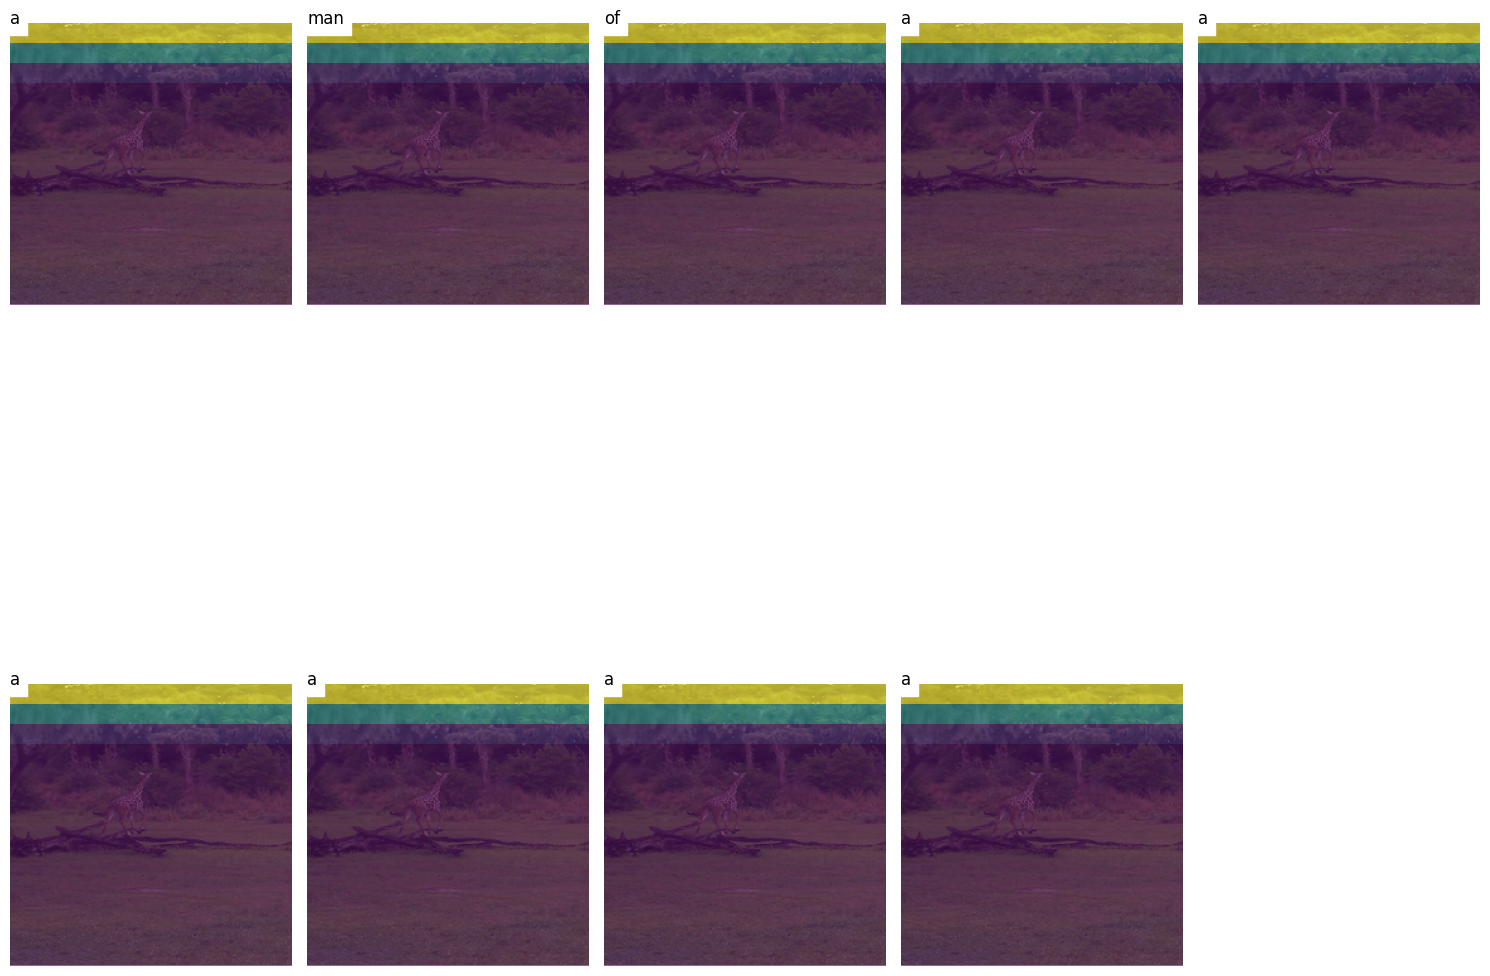

In [ ]:
# Load image
image_path = os.path.join(IMAGE_FOLDER2, f"{int(selected_val_image_ids[0]):012}.jpg")
image = Image.open(image_path).convert("RGB")

# Transform image
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
image_tensor = transform(image).unsqueeze(0).to(device)

# Encode image
encoder_out = encoder(image_tensor)
caption, alphas = generate_caption_with_attention(decoder, encoder_out, word_map)

# Visualize
visualize_attention(image_path, caption, alphas)